In [1]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.compiler import transpile, assemble

# Chercher une valeur dans un tableau et retourner son indice

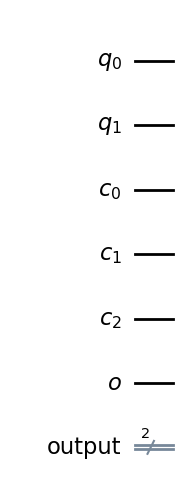

In [2]:
# Initialisation du circuit
qr0 = QuantumRegister(2, name='q')
qr1 = QuantumRegister(3, name = 'c')
qr2 = QuantumRegister(1, name = 'o')
    
output = ClassicalRegister(2, name ='output')
    
qc = QuantumCircuit(qr0,qr1,qr2,output)

qc.draw('mpl')

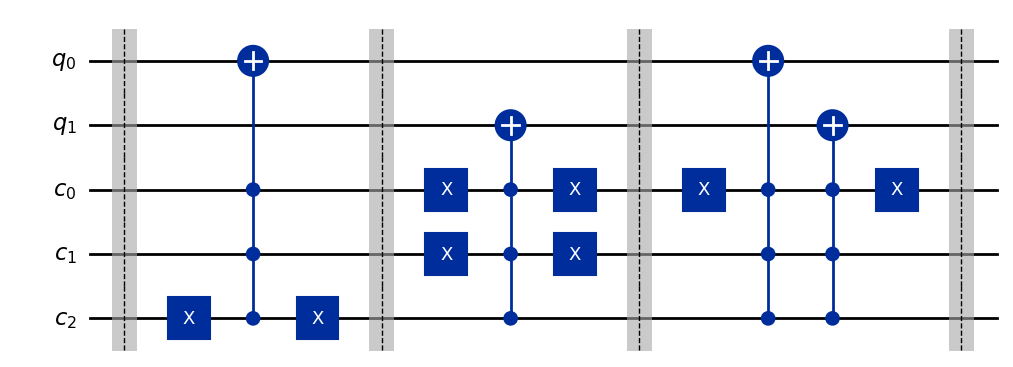

In [3]:
def decode_data():
    # Initialisation du circuit quantique
    qr0 = QuantumRegister(2, name='q')
    qr1 = QuantumRegister(3, name = 'c')
    
    qc = QuantumCircuit(qr0,qr1, name ='decode' )
    # Application de l'oracle
    # Encodage des valeurs de T dans le circuit quantique
    # T[0] = 101
    qc.barrier()
    
    # T[1] = 011
    qc.x(4)
    qc.mcx([2,3,4],0)
    qc.x(4)
    qc.barrier()
    
    # T[2] = 100
    qc.x(3)
    qc.x(2)
    qc.mcx([2,3,4],1)
    qc.x(3)
    qc.x(2)
    qc.barrier()
    
    # T[3] = 110
    qc.x(2)
    qc.mcx([2,3,4],0)
    qc.mcx([2,3,4],1)
    qc.x(2)
    qc.barrier()

    return qc

dc = decode_data()

# Affichage du circuit
dc.draw('mpl')

état cible 4 i.e. 100


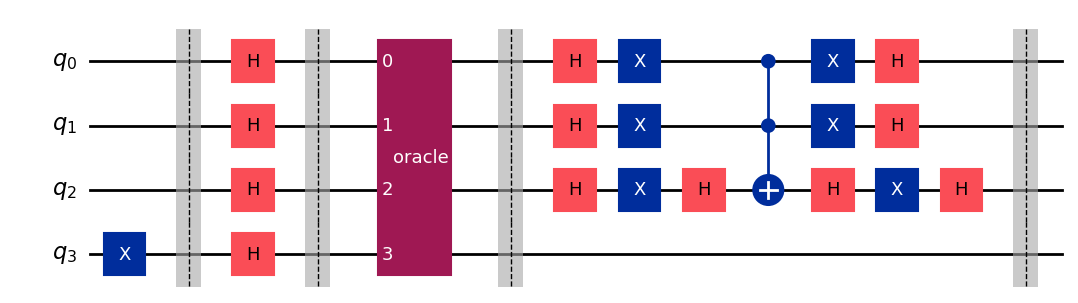

In [4]:
def oracle_generator(n_qubits, target_state):
    oracle = QuantumCircuit(n_qubits+1, name='oracle')
    
    target_binary = f"{target_state:0{n_qubits}b}"[::-1]
    
    for qubit, bit in enumerate(target_binary):
        if bit == '0':
            oracle.x(qubit)
            
    oracle.mcx(list(range(n_qubits)), n_qubits)
    
    for qubit, bit in enumerate(target_binary):
        if bit == '0':
            oracle.x(qubit)
    
    return oracle

def diffusion_operator(circuit, n):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n - 1)
    circuit.mcx(list(range(n - 1)), n - 1)  # Contrôle multiple sur tous les qubits sauf le dernier
    circuit.h(n - 1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit
    
def grover(n_qubits, oracle, iter=1):

    #initialisation
    grover_circuit = QuantumCircuit(n_qubits+1, name = 'Grover')
    grover_circuit.x(n_qubits)
    grover_circuit.barrier()
    grover_circuit.h(range(n_qubits+1))
    grover_circuit.barrier()

    for _ in range(iter):
        #ajout de l'oracle
        grover_circuit.append(oracle, range(n_qubits+1))
        grover_circuit.barrier()
            
        #amplification
        diffusion_operator(grover_circuit, n_qubits)
        grover_circuit.barrier()

    return grover_circuit 

oracle = oracle_generator(3,4)
print("état cible",4, "i.e.",f"{4:0{3}b}")

gc = grover(3,oracle)
gc.draw('mpl')

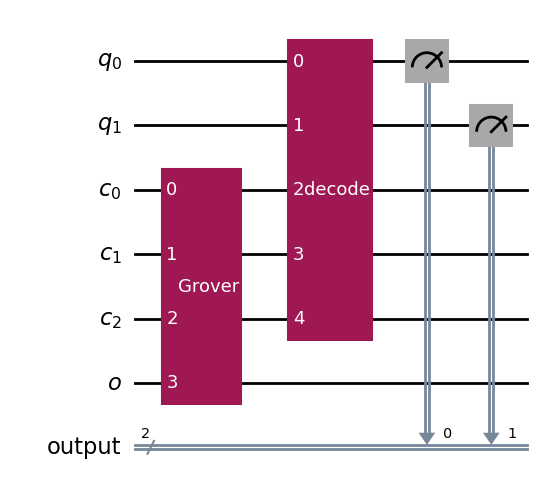

In [5]:
qc.append(gc, range(2,6))

qc.append(dc, range(5))

qc.measure(range(2), range(2))

qc.draw('mpl')

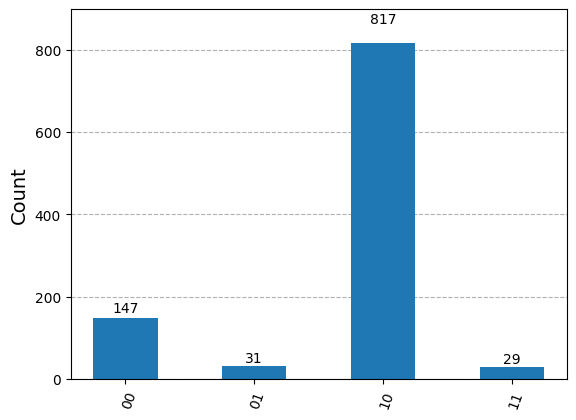

In [6]:
backend = AerSimulator()
transpiled_circuit = transpile(qc, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

# Chercher un indice dans un tableau et retourner la valeur associée

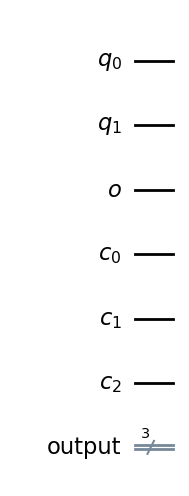

In [7]:
# Initialisation du circuit
qr0 = QuantumRegister(2, name='q')
qr1 = QuantumRegister(3, name = 'c')
qr2 = QuantumRegister(1, name = 'o')
    
output = ClassicalRegister(3, name ='output')
    
qc = QuantumCircuit(qr0,qr2,qr1,output)

qc.draw('mpl')

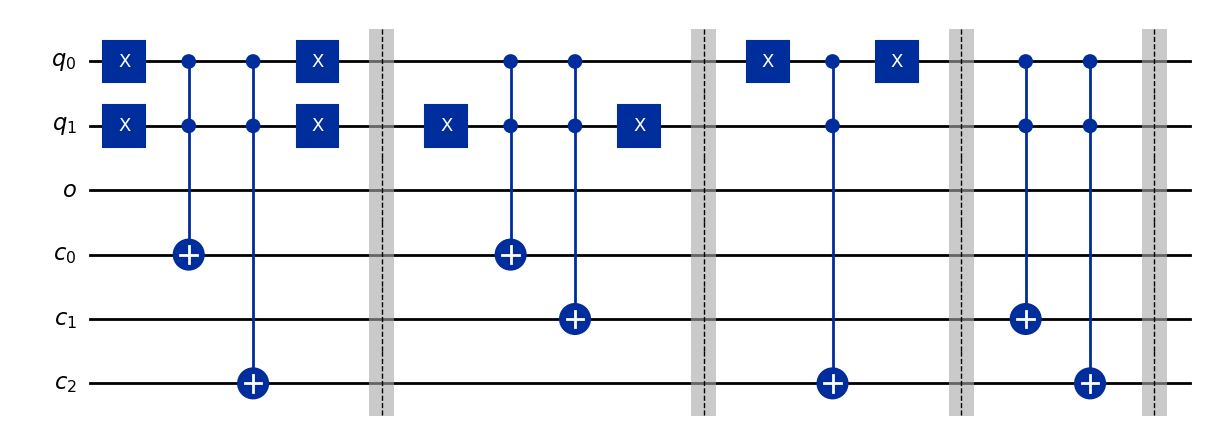

In [8]:
def encode_data():
    # Initialisation du circuit quantique
    qr0 = QuantumRegister(2, name='q')
    qr1 = QuantumRegister(3, name = 'c')
    qr2 = QuantumRegister(1, name = 'o')
    
    qc = QuantumCircuit(qr0,qr2,qr1,name='encode')
    # Application de l'oracle
    # Décodage indice vers leur valeur
    # T[0] = 101
    qc.x(0)
    qc.x(1)
    qc.mcx([0,1],3)
    qc.mcx([0,1],5)
    qc.x(0)
    qc.x(1)
    qc.barrier()
    
    # T[1] = 011
    qc.x(1)
    qc.mcx([0,1],3)
    qc.mcx([0,1],4)
    qc.x(1)
    qc.barrier()
    
    # T[2] = 100
    qc.x(0)
    qc.mcx([0,1],5)
    qc.x(0)
    qc.barrier()
    
    # T[3] = 110
    qc.mcx([0,1],4)
    qc.mcx([0,1],5)
    qc.barrier()

    return qc

ec = encode_data()

# Affichage du circuit
ec.draw('mpl')

état cible 2 i.e. 10


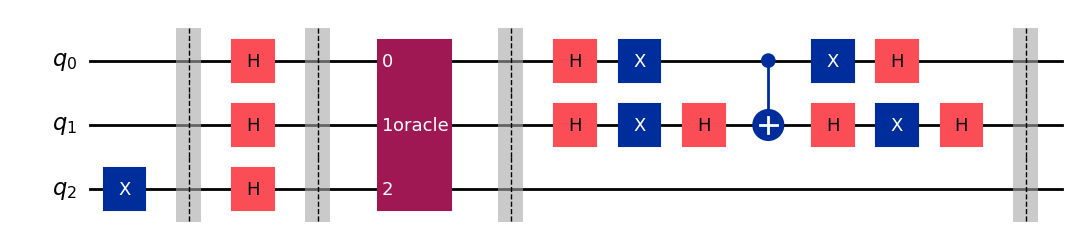

In [9]:
oracle = oracle_generator(2,2)
print("état cible",2, "i.e.",f"{2:0{2}b}")

gc = grover(2,oracle)
gc.draw('mpl')

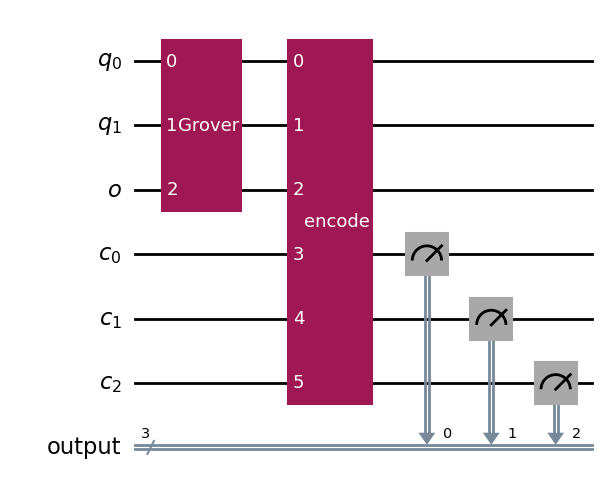

In [10]:
qc.append(gc, range(3))

qc.append(ec, range(6))

qc.measure(range(3,6), range(3))

qc.draw('mpl')

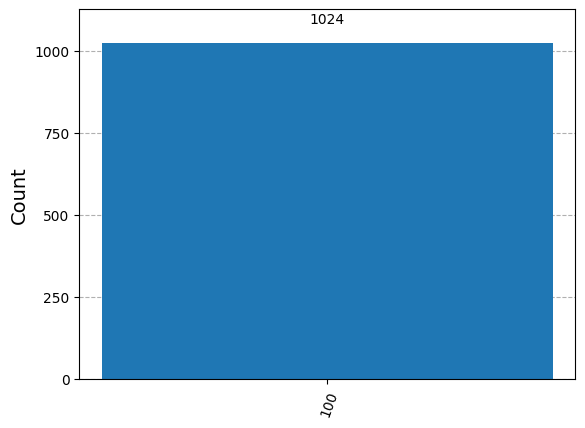

In [11]:
backend = AerSimulator()
transpiled_circuit = transpile(qc, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)